<a href="https://colab.research.google.com/github/fulcrum3/deep_learning/blob/master/tensorflow/NLP/single_layer_biderctional_LSTM_with_embeddings_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Layer LSTM

In [0]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


In [0]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteBDDYNR/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteBDDYNR/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteBDDYNR/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 1121s 3s/step - loss: 0.5431 - accuracy: 0.7197 - val_loss: 0.4432 - val_accuracy: 0.8067
Epoch 2/10
391/391 [==============================] - 1119s 3s/step - loss: 0.3826 - accuracy: 0.8410 - val_loss: 0.5124 - val_accuracy: 0.7470
Epoch 3/10
391/391 [==============================] - 1118s 3s/step - loss: 0.3343 - accuracy: 0.8674 - val_loss: 0.4478 - val_accuracy: 0.8188
Epoch 4/10
391/391 [==============================] - 1130s 3s/step - loss: 0.2907 - accuracy: 0.8851 - val_loss: 0.5933 - val_accuracy: 0.6757
Epoch 5/10
391/391 [==============================] - 1134s 3s/step - loss: 0.3033 - accuracy: 0.8770 - val_loss: 0.4519 - val_accuracy: 0.8167
Epoch 6/10
391/391 [==============================] - 1282s 3s/step - loss: 0.2622 - accuracy: 0.8976 - val_loss: 0.5053 - val_accuracy: 0.8134
Epoch 7/10
391/391 [==============================] - 1285s 3s/step - loss: 0.1792 - accuracy: 0.9340 - val_loss: 0.5050 - val_accuracy:

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

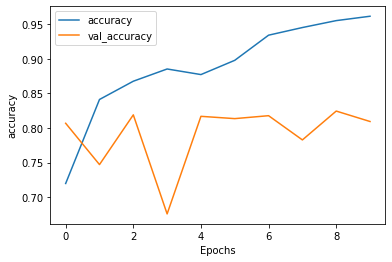

In [11]:
plot_graphs(history, 'accuracy')

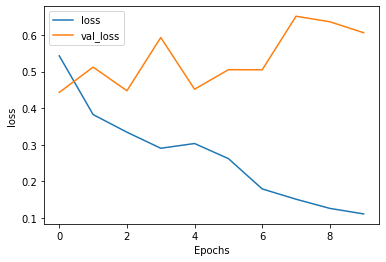

In [12]:
plot_graphs(history, 'loss')